In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [101]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [102]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [103]:
df.drop('customerID', axis=1, inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [105]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [106]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [107]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_3196\1543093540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)


In [108]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [109]:
#encode
df["Churn"]=df["Churn"].map({'Yes': 1, 'No':0})

In [110]:
cat_cols=df.select_dtypes(include="object").columns

In [111]:
df=pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [112]:
x=df.drop("Churn", axis=1)
y=df["Churn"]

In [113]:
x_test, x_train, y_test, y_train=train_test_split(x, y, test_size=0.2, random_state=42)


In [114]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [115]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [116]:
y_pred=model.predict(x_test)

In [117]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [118]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nclassification report:\n ", classification_report(y_test, y_pred))

Accuracy 0.7994320198793042

confusion matrix:
 [[3688  450]
 [ 680  816]]

classification report:
                precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.64      0.55      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634



In [119]:
coeff=pd.Series(model.coef_[0], index=x.columns)
importantfeatures=coeff.sort_values(ascending=False).head(10) 

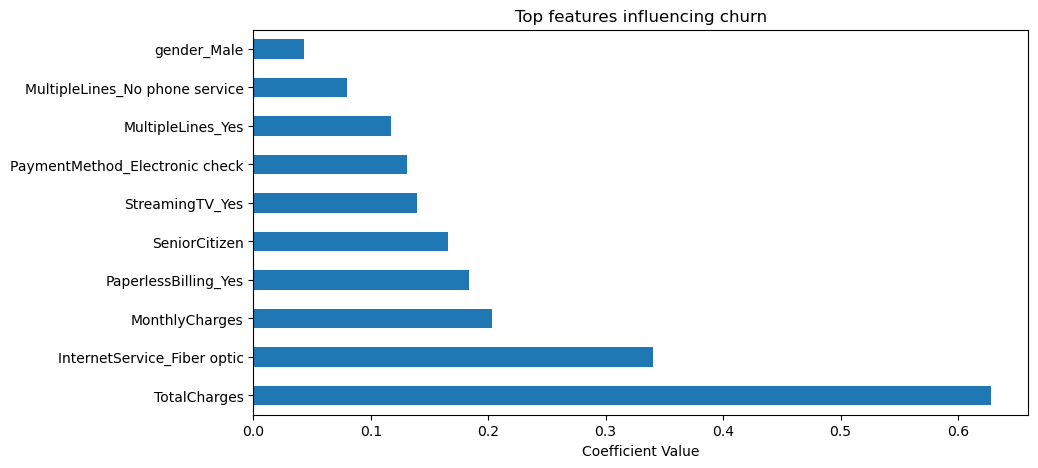

In [120]:
plt.figure(figsize=(10,5))
importantfeatures.plot(kind='barh')
plt.title('Top features influencing churn')
plt.xlabel("Coefficient Value")
plt.show()